## Doing Fig4 of Deep's paper

In [ ]:
          |  Deep: hasNS   |  Deep: hasREM  ||   RF: hasNS    |   RF: hasREM  ||  KNN: hasNS    |   KNN: hasREM
Threshold |  TP     FP     |  TP     FP     ||  TP     FP     |  TP     FP    ||  TP    FP      |   TP   FP           
0.07      |  0.999  0.144  |  0.995  0.106  ||  0.999  0.118  |  0.998  0.033 ||  1.000  0.000  |   0.994  0.090
0.27      |  0.995  0.096  |  0.979  0.040  ||  0.994  0.076  |  0.992  0.015 ||  0.998  0.134  |   0.981  0.040
0.51      |  0.986  0.061  |  0.949  0.014  ||  0.984  0.048  |  0.981  0.009 ||  0.990  0.072  |   0.953  0.014
0.80      |  0.959  0.028  |  0.894  0.003  ||  0.961  0.020  |  0.959  0.004 ||  0.981  0.053  |   0.904  0.004
0.94      |  0.900  0.010  |  0.822  0.001  ||  0.925  0.007  |  0.925  0.002 ||  0.965  0.034  |   0.850  0.001

In [100]:
import KNNclassy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text',usetex=True)
rc('font',family='serif')


In [101]:
import importlib
importlib.reload(KNNclassy)

<module 'KNNclassy' from '/Users/miquelmiravet/Projects/IPAM_LA/ML_group/KNN_miq/KNNclassy.py'>

In [102]:
path = '/Users/miquelmiravet/Projects/IPAM_LA/ML_group/KNN_miq/'

In [103]:
KNN_REM = KNNclassy.ClassificationKNN('REM')
KNN_REM.load_datasets(path)
modelKNN_REM = KNN_REM.build_model()
fitmodelKNN_REM = modelKNN_REM.fit(KNN_REM.xtrain,KNN_REM.ytrain.ravel())

KNN_NS = KNNclassy.ClassificationKNN('NS')
KNN_NS.load_datasets(path)
modelKNN_NS = KNN_NS.build_model()
fitmodelKNN_NS = modelKNN_NS.fit(KNN_NS.xtrain,KNN_NS.ytrain.ravel())

File shape :  (139999, 20)
File shape :  (59999, 20)
xtrain shape :  (139999, 5)
xtest shape :  (59999, 5)
File shape :  (139999, 20)
File shape :  (59999, 20)
xtrain shape :  (139999, 5)
xtest shape :  (59999, 5)


In [115]:
def generateMasses(algo,N):
    data=algo.xtest
    maxm1=np.max(data[:,0])
    minm1=np.min(data[:,0])
    maxm2=np.max(data[:,1])
    minm2=np.min(data[:,1])
    print("Trained with m1 in (",minm1,",",maxm1,")")
    print("Trained with m2 in (",minm2,",",maxm2,")")
    m1=np.linspace(start=minm1, stop=maxm1, num=N)
    m2=np.linspace(start=minm2, stop=maxm2, num=N)
    masses = []
    for i in range(0,N):
        for j in range(0,N):
            if(m1[i]>m2[j]):
                masses.append([m1[i],m2[j]])

    return masses

def generateMasses_limited(N):
    maxm1=50
    minm1=1
    maxm2=15
    minm2=1
    m1=np.linspace(start=minm1, stop=maxm1, num=N)
    m2=np.linspace(start=minm2, stop=maxm2, num=N)
    masses=[]
    for i in range(0,N):
        for j in range(0,N):
            if(m1[i]>m2[j]):
                masses.append([m1[i],m2[j]])

    return masses

        
def probLabelDensePlot(model, masses, chi1, chi2, snr,label):
    N=len(masses)
    X=[]
    m1=np.zeros(N)
    m2=np.zeros(N)
    for k in range(0,N):
        X.append([masses[k][0],masses[k][1],chi1,chi2,snr])
        m1[k]=masses[k][0]
        m2[k]=masses[k][1]
    proba_dense   = model.predict_proba(X)
    proba_dense1d = proba_dense[:,1]
    plt.figure(figsize = (10,3))
    plt.tick_params(axis='y',labelsize=13)
    plt.tick_params(axis='x',labelsize=13)
    sc=plt.scatter(m1,m2, c=proba_dense1d, vmin=0, vmax=1, s=40, cmap='viridis')
    cbar = plt.colorbar(sc)
    cbar.ax.tick_params(labelsize=13)
    if label == 'NS':
        plt.axhline(y = 3, color = 'r', linestyle = '-')
    plt.title(r'$\chi^z_1$ = '+str(chi1)+', $\chi^z_2$ = '+str(chi2)+', SNR='+str(snr),fontsize=18)
    plt.xlabel(r"$m_1$", fontsize=18)
    plt.xlim([1,50])
    plt.ylim([1,15])
    plt.ylabel(r"$m_2$", fontsize=18)
    plt.show()
    return


In [116]:
M_l=generateMasses_limited(200)

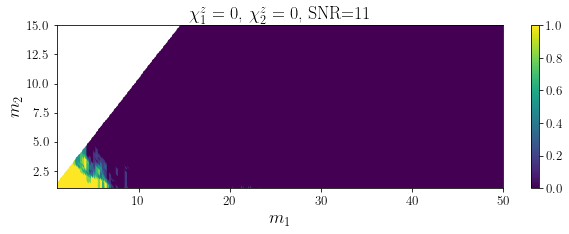

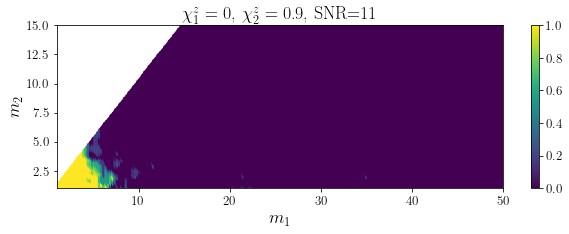

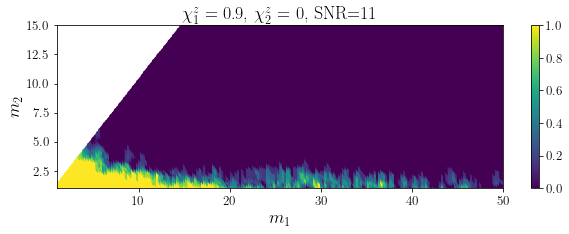

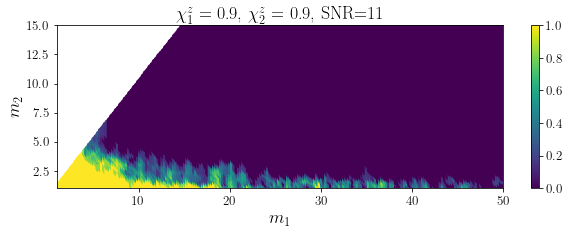

In [117]:
probLabelDensePlot(modelKNN_REM,M_l,0,0,11,KNN_REM.label)
probLabelDensePlot(modelKNN_REM,M_l,0,0.9,11,KNN_REM.label)
probLabelDensePlot(modelKNN_REM,M_l,0.9,0,11,KNN_REM.label)
probLabelDensePlot(modelKNN_REM,M_l,0.9,0.9,11,KNN_REM.label)

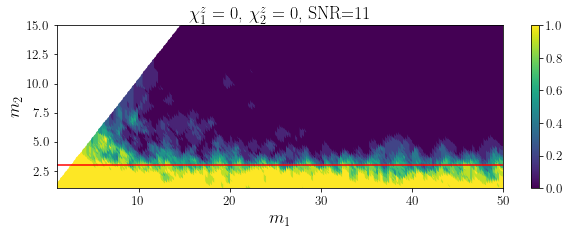

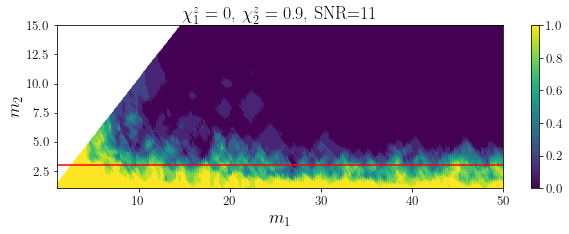

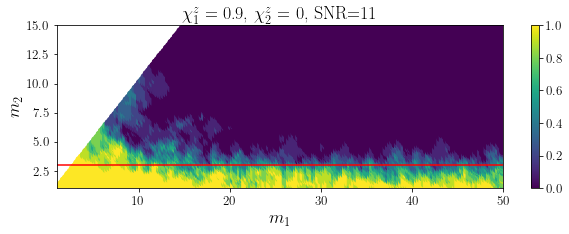

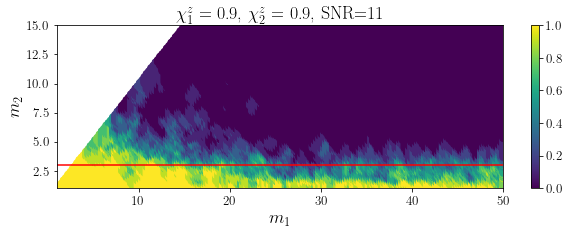

In [118]:
probLabelDensePlot(modelKNN_NS,M_l,0,0,11,KNN_NS.label)
probLabelDensePlot(modelKNN_NS,M_l,0,0.9,11,KNN_NS.label)
probLabelDensePlot(modelKNN_NS,M_l,0.9,0,11,KNN_NS.label)
probLabelDensePlot(modelKNN_NS,M_l,0.9,0.9,11,KNN_NS.label)

Figure 6 (extension to see variation with SNR)

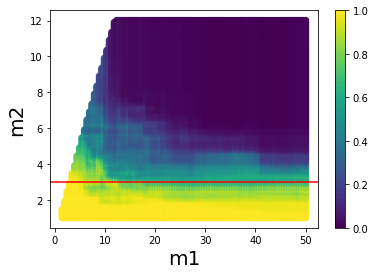

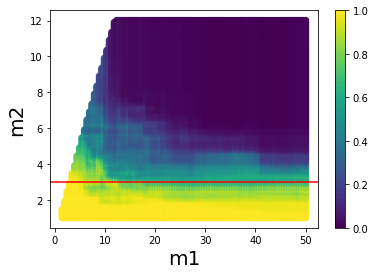

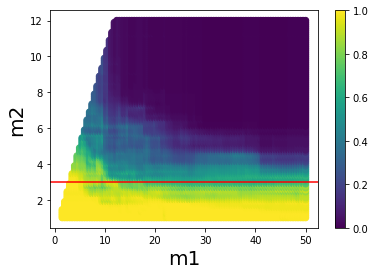

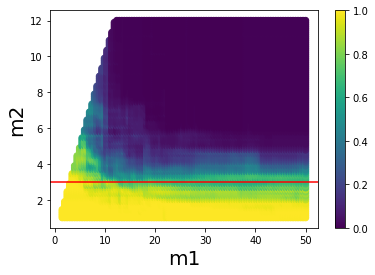

In [11]:
probLabelDensePlot_hasNS(RFns.model,M_l,0,0,5)
probLabelDensePlot_hasNS(RFns.model,M_l,0,0,7)
probLabelDensePlot_hasNS(RFns.model,M_l,0,0,9)
probLabelDensePlot_hasNS(RFns.model,M_l,0,0,11)

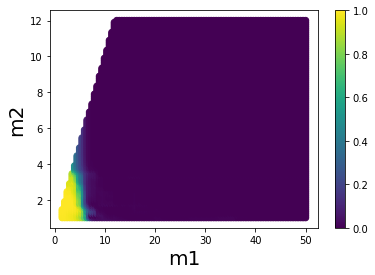

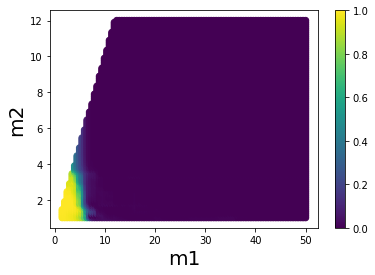

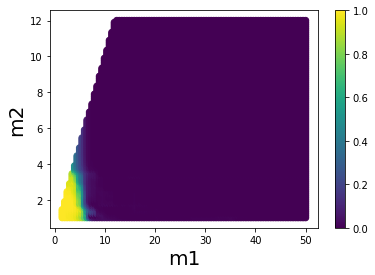

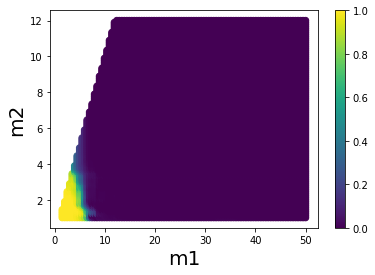

In [12]:
probLabelDensePlot_hasREM(RF.model,M_l,0,0,5)
probLabelDensePlot_hasREM(RF.model,M_l,0,0,7)
probLabelDensePlot_hasREM(RF.model,M_l,0,0,9)
probLabelDensePlot_hasREM(RF.model,M_l,0,0,11)